## **Exploratory Data Analysis(EDA)**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_train=pd.read_csv("/content/drive/MyDrive/Yashwant_Jangid_Minor_Projects/train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Yashwant_Jangid_Minor_Projects/test.csv")
df_gender=pd.read_csv("/content/drive/MyDrive/Yashwant_Jangid_Minor_Projects/gender_submission.csv")

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We are specifically concentrating on "df_train" dataset as Survived column is already in it .

Making it as the main working set ...

In [10]:
df=df_train

In [11]:
df.shape

(891, 12)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Data Cleaning**

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df=df.dropna()

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S


In [21]:
df['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

<Axes: >

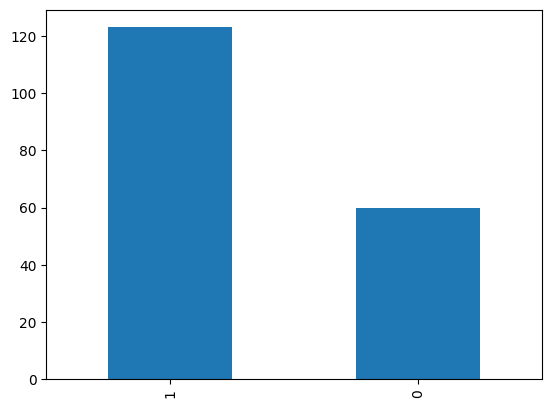

In [22]:
df['Survived'].value_counts().plot(kind='bar')

In [23]:
df['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

<Axes: >

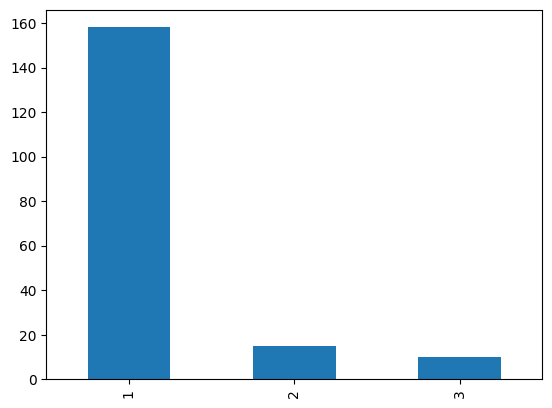

In [24]:
df['Pclass'].value_counts().plot(kind='bar')

**We can see that most of the passengers are from the 1st class on titanic.**

In [25]:
df.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.55,E38,S


In [26]:
df['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [27]:
def to_numeric(Sex):
  if Sex =='male':
    return 1
  else:
    return 0





In [28]:
df['Sex']=df['Sex'].apply(to_numeric)

<ipython-input-28-a583a3838b00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=df['Sex'].apply(to_numeric)


<Axes: xlabel='Sex', ylabel='Survived'>

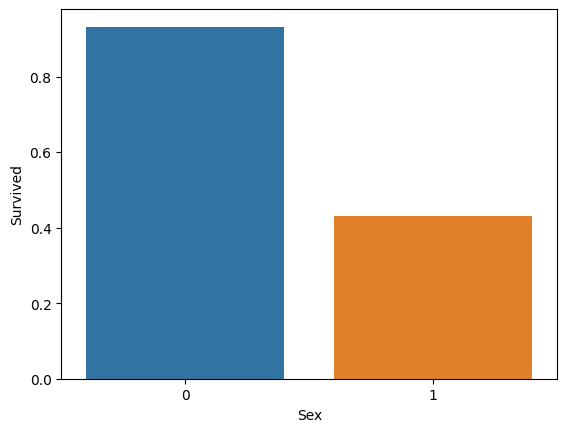

In [29]:
sns.barplot(x=df['Sex'],y=df['Survived'],errorbar=None)


In [30]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",1,58.0,0,2,35273,113.2750,D48,C
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",0,34.0,0,0,C.A. 34260,10.5000,F33,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",0,39.0,1,1,110413,79.6500,E67,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S
835,836,1,1,"Compton, Miss. Sara Rebecca",0,39.0,1,1,PC 17756,83.1583,E49,C


In [31]:
df['Age'].value_counts()

36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: Age, Length: 63, dtype: int64

<Axes: ylabel='Age'>

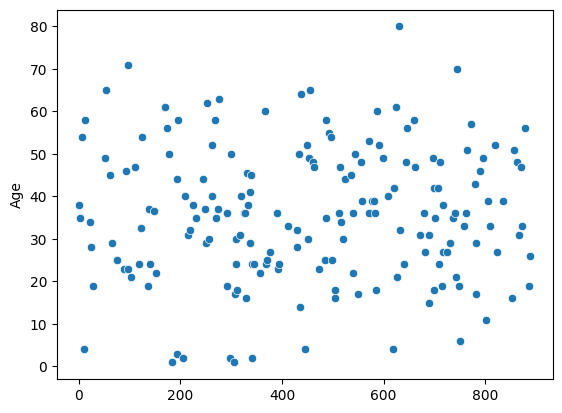

In [32]:
sns.scatterplot(df['Age'])

In [33]:
df['Parch'].value_counts()

0    122
1     37
2     23
4      1
Name: Parch, dtype: int64

In [34]:
df['SibSp'].value_counts()

0    110
1     64
2      6
3      3
Name: SibSp, dtype: int64

**We can merge these two columns in the single as the total relatives boarded on the titanic.**

In [35]:
df['relatives']=df['SibSp'] + df['Parch']
df.head()

<ipython-input-35-a538f8c78632>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relatives']=df['SibSp'] + df['Parch']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S,0


**We can drop the columns "SibSp" and "Parch" .**

In [36]:
df=df.drop(columns=['SibSp','Parch'])

In [37]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
456,457,0,1,"Millet, Mr. Francis Davis",1,65.0,13509,26.55,E38,S,0


In [38]:
df['relatives'].value_counts()

0    79
1    61
2    28
3     9
5     4
4     2
Name: relatives, dtype: int64

<Axes: >

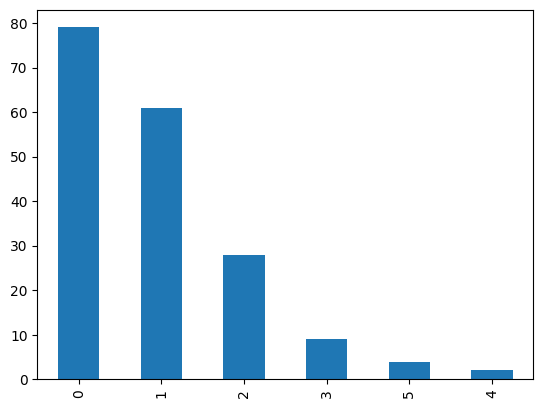

In [39]:
df['relatives'].value_counts().plot(kind='bar')

<Axes: ylabel='Fare'>

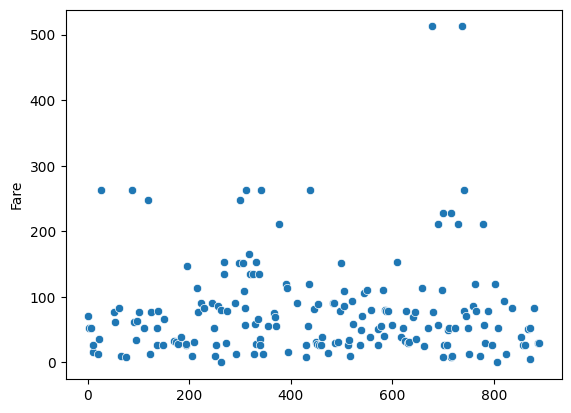

In [40]:
sns.scatterplot(df['Fare'])

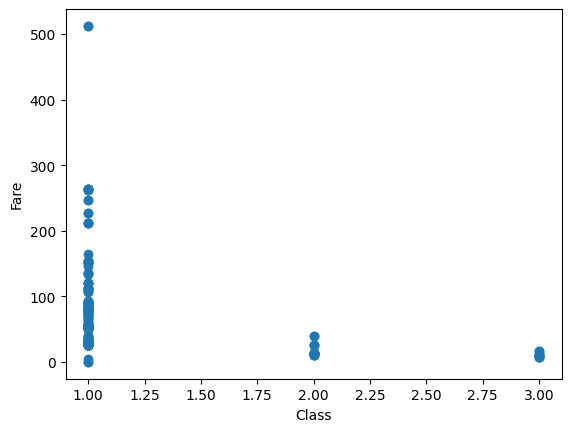

In [41]:
plt.scatter(x=df['Pclass'],y=df['Fare'])
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

In [42]:
df.sample()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",0,21.0,PC 17608,262.375,B57 B59 B63 B66,C,4


In [43]:
df['Ticket'].value_counts()

113760      4
19950       4
PC 17582    3
35273       3
24160       3
           ..
113784      1
113043      1
28551       1
36928       1
111369      1
Name: Ticket, Length: 127, dtype: int64

In [44]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: Cabin, Length: 133, dtype: int64

In [45]:
df['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

<Axes: >

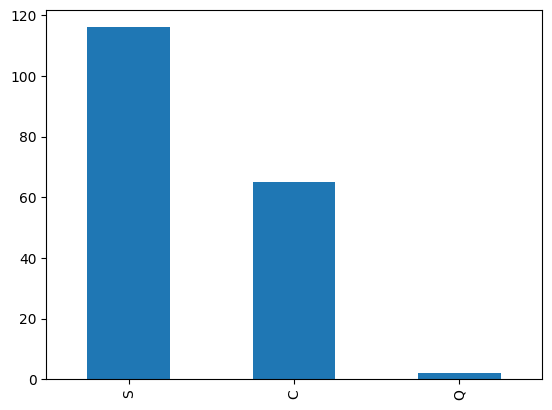

In [46]:
df['Embarked'].value_counts().plot(kind='bar')

Mostly passengers were boarded from S or C around 116 and 65 respectively.

We can allocate S as 0 , C as 1 and Q as 2 for better handling.

In [47]:
def change(Embarked):
  if Embarked=='S':
    return 0
  elif Embarked=='C':
    return 1
  else:
    return 2


In [48]:
df['Embarked']=df['Embarked'].apply(change)

In [49]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
453,454,1,1,"Goldenberg, Mr. Samuel L",1,49.0,17453,89.1042,C92,1,1
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",1,18.0,PC 17758,108.9000,C65,1,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,PC 17755,512.3292,B51 B53 B55,1,1
484,485,1,1,"Bishop, Mr. Dickinson H",1,25.0,11967,91.0792,B49,1,1
789,790,0,1,"Guggenheim, Mr. Benjamin",1,46.0,PC 17593,79.2000,B82 B84,1,0


In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,17463,51.8625,E46,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,PP 9549,16.7000,G6,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,113783,26.5500,C103,0,0


In [51]:
df['Name'].apply(lambda x:x.split()[2])


1            John
3         Jacques
6         Timothy
10     Marguerite
11      Elizabeth
          ...    
871       Richard
872         Frans
879        Thomas
887      Margaret
889          Karl
Name: Name, Length: 183, dtype: object

In [52]:
df['Name'].apply(lambda x:x.split()[0].replace(",","" ))


1        Cumings
3       Futrelle
6       McCarthy
10     Sandstrom
11       Bonnell
         ...    
871     Beckwith
872     Carlsson
879       Potter
887       Graham
889         Behr
Name: Name, Length: 183, dtype: object

In [53]:
df['Name']=(df['Name'].apply(lambda x:x.split()[2]))+(" ")+(df['Name'].apply(lambda x:x.split()[0].replace(",","" ))
)


In [54]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
21,22,1,2,Lawrence Beesley,1,34.0,248698,13.0000,D56,0,0
339,340,0,1,Stephen Blackwell,1,45.0,113784,35.5000,T,0,0
625,626,0,1,Frederick Sutton,1,61.0,36963,32.3208,D50,0,0
434,435,0,1,William Silvey,1,50.0,13507,55.9000,E44,0,1
558,559,1,1,Emil Taussig,0,39.0,110413,79.6500,E67,0,2


We just make the names more understandable by keeping only first and last name .

In [55]:
df['Age']=df['Age'].astype('int64')
df['Fare']=df['Fare'].astype('int64')

In [56]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int64
Age             int64
Ticket         object
Fare            int64
Cabin          object
Embarked        int64
relatives       int64
dtype: object

 We have successfully converted all numerical datasets to int type .


Only 'Name' , 'Ticket' and 'Cabin' are categorical which can be converted using Encoder if needed .

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
1,2,1,1,John Cumings,0,38,PC 17599,71,C85,1,1
3,4,1,1,Jacques Futrelle,0,35,113803,53,C123,0,1
6,7,0,1,Timothy McCarthy,1,54,17463,51,E46,0,0
10,11,1,3,Marguerite Sandstrom,0,4,PP 9549,16,G6,0,2
11,12,1,1,Elizabeth Bonnell,0,58,113783,26,C103,0,0


<Axes: xlabel='PassengerId', ylabel='Age'>

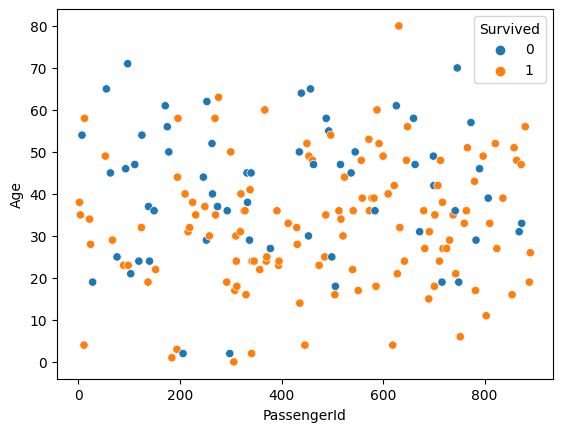

In [58]:
sns.scatterplot(x=df['PassengerId'],y=df['Age'],hue=df['Survived'])

<Axes: xlabel='Sex', ylabel='Survived'>

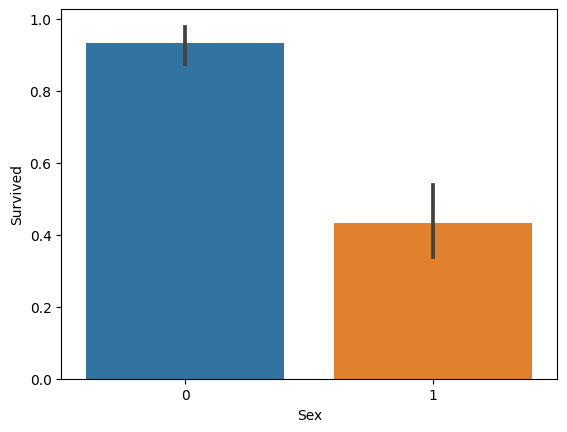

In [59]:
sns.barplot(x=df['Sex'],y=df['Survived'])

<Axes: xlabel='Pclass', ylabel='Survived'>

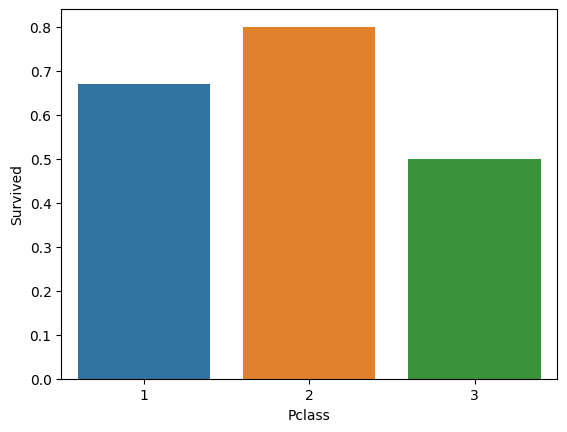

In [60]:
sns.barplot(x=df['Pclass'],y=df['Survived'],errorbar=None)

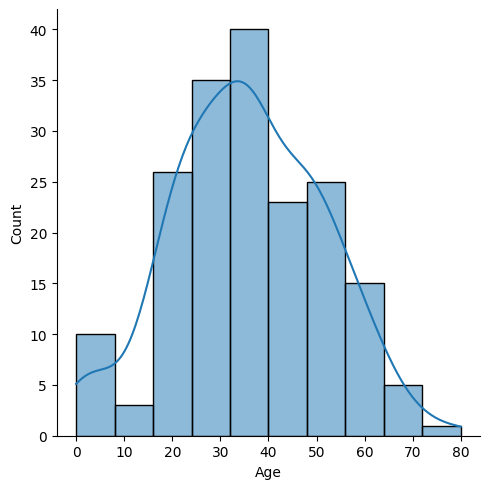

In [61]:
sns.displot(x=df['Age'],kde=True)

People of age from 32-40 are boarded maximum and then 24-30 age group.

In [62]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
621,622,1,1,Edwin Kimball,1,42,11753,52,D19,0,1


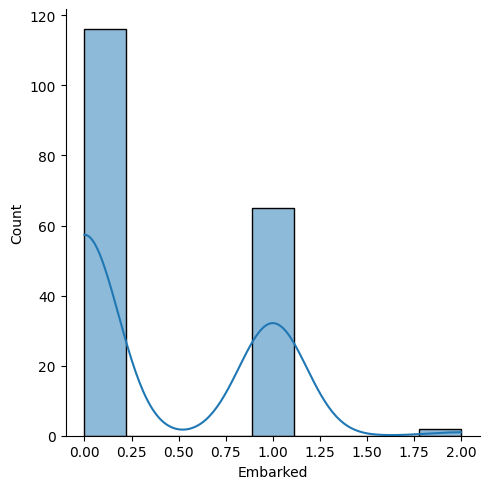

In [63]:
sns.displot(x=df['Embarked'],kde=True)

# **Summarization**

#Mostly passengers were boarded from S and C around 116 and 65 respectively.
#Maximum People boarded alone i.e. without any relatives.
#Females are more survived so Survival is a direct relation to sex.
#2nd Class are more survived than 1st and 3rd class people.
#No direct relation of age and survival.
#Most of the People are of age group 32-40 (or for a wider analysis 22-40).
#Fare is more for the 1st class which is obivious.
